# Мы попытаемся понять данные о том, как ведут себя студенты образовательной компании. 
# Посмотрим, как часто страница посещалась по времени

## Сделать подключение к базе данных (она такая же, как и в предыдущий день)

In [1]:
import pandas as pd
import sqlite3


conn = sqlite3.connect('../data/checking-logs.sqlite')

## Выполнить запрос, который получает дату и время из таблицы просмотров страниц, выбирая только пользователей, а не администраторов

In [2]:
query = '''
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%';
'''
df = pd.read_sql_query(query, conn)

## Используя Pandas, создайте новый фрейм данных, в котором посещения подсчитываются и группируются по дате.

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
visits_per_day = df.groupby('date').size().reset_index(name='views')
print(visits_per_day)

          date  views
0   2020-04-17      1
1   2020-04-18     23
2   2020-04-19     15
3   2020-04-21      3
4   2020-04-22      1
5   2020-04-23      5
6   2020-04-25      1
7   2020-04-26      8
8   2020-04-28      2
9   2020-04-29      4
10  2020-04-30      9
11  2020-05-01      3
12  2020-05-02      6
13  2020-05-03     19
14  2020-05-04      1
15  2020-05-05      1
16  2020-05-06      3
17  2020-05-07      2
18  2020-05-08     48
19  2020-05-09     19
20  2020-05-10    110
21  2020-05-11    200
22  2020-05-12     85
23  2020-05-13    102
24  2020-05-14    187
25  2020-05-15     29
26  2020-05-16      4
27  2020-05-17      9
28  2020-05-18     51
29  2020-05-19     11
30  2020-05-20     12
31  2020-05-21     11
32  2020-05-22      2


## Используя метод Pandas .plot(), создайте график
размер шрифта должен быть 8
размер фигуры (15,8)
график должен иметь заголовок Просмотры в день
обратите внимание на вращение x-тиков на графике ниже

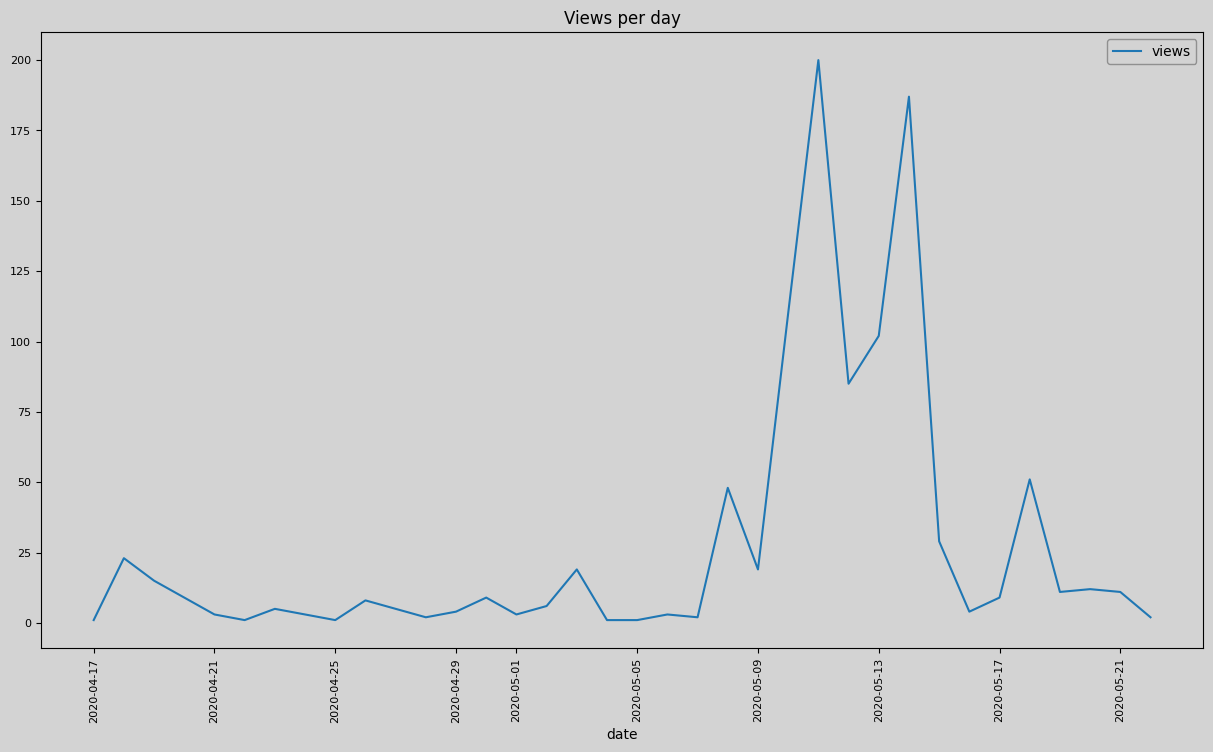

In [4]:
plot = visits_per_day.plot(x='date', y='views', kind='line', figsize=(15, 8), title='Views per day', legend=True)

plot.set_xlabel('date')
plot.figure.set_facecolor('lightgray')
plot.set_facecolor('lightgrey')
plot.xaxis.set_tick_params(rotation=90)
plot.yaxis.set_tick_params(labelsize=8)
plot.xaxis.set_tick_params(labelsize=8)

plot.legend(facecolor='lightgrey', edgecolor='grey')

## Закрыть соединение с базой данных

In [5]:
conn.close()